In [35]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import vstack, csr_matrix
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import vstack, csr_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [36]:
data = pd.read_csv("final_data.csv")
data.head(3)

,Year,Month,DayOfWeek,Operating_Airline,Origin,Dest,DepDelay,DepTimeBlk,ArrDelay,ArrTimeBlk,...,Dest_HourlyDewPointTemperature,Dest_HourlyDryBulbTemperature,Dest_HourlyPrecipitation,Dest_HourlyRelativeHumidity,Dest_HourlySeaLevelPressure,Dest_HourlyVisibility,Dest_HourlyWindDirection,Dest_HourlyWindGustSpeed,Dest_HourlyWindSpeed,Holiday
0,2018,1,1,EV,ATL,ABE,118.0,1500-1559,110.0,1700-1759,...,-17.2,-11.7,0.0,64.0,1029.3,16.093,230-270,0.0,3.1,Around Newyear
1,2018,1,2,EV,ATL,ABE,25.0,1500-1559,13.0,1700-1759,...,-16.7,-10.6,0.0,61.0,1027.9,16.093,230-270,0.0,3.1,Around Newyear
2,2018,1,3,EV,ATL,ABE,7.0,1000-1059,15.0,1200-1259,...,-16.7,-4.4,0.0,38.0,1021.5,16.093,0-40,0.0,1.5,After Newyear


In [37]:
data.columns

Index(['Year', 'Month', 'DayOfWeek', 'Operating_Airline ', 'Origin', 'Dest',
       'DepDelay', 'DepTimeBlk', 'ArrDelay', 'ArrTimeBlk', 'Cancelled',
       'ActualElapsedTime', 'Distance', 'Origin_HourlyAltimeterSetting',
       'Origin_HourlyDewPointTemperature', 'Origin_HourlyDryBulbTemperature',
       'Origin_HourlyPrecipitation', 'Origin_HourlyRelativeHumidity',
       'Origin_HourlySeaLevelPressure', 'Origin_HourlyVisibility',
       'Origin_HourlyWindDirection', 'Origin_HourlyWindGustSpeed',
       'Origin_HourlyWindSpeed', 'Dest_HourlyAltimeterSetting',
       'Dest_HourlyDewPointTemperature', 'Dest_HourlyDryBulbTemperature',
       'Dest_HourlyPrecipitation', 'Dest_HourlyRelativeHumidity',
       'Dest_HourlySeaLevelPressure', 'Dest_HourlyVisibility',
       'Dest_HourlyWindDirection', 'Dest_HourlyWindGustSpeed',
       'Dest_HourlyWindSpeed', 'Holiday'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700585 entries, 0 to 9700584
Data columns (total 34 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Year                              int64  
 1   Month                             int64  
 2   DayOfWeek                         int64  
 3   Operating_Airline                 object 
 4   Origin                            object 
 5   Dest                              object 
 6   DepDelay                          float64
 7   DepTimeBlk                        object 
 8   ArrDelay                          float64
 9   ArrTimeBlk                        object 
 10  Cancelled                         int64  
 11  ActualElapsedTime                 float64
 12  Distance                          int64  
 13  Origin_HourlyAltimeterSetting     float64
 14  Origin_HourlyDewPointTemperature  float64
 15  Origin_HourlyDryBulbTemperature   float64
 16  Origin_HourlyPrecipitation        fl

In [39]:
data['Year']=data['Year'].astype('category')
data['Month']=data['Month'].astype('category')
data['DayOfWeek']=data['DayOfWeek'].astype('category')
data['Operating_Airline ']=data['Operating_Airline '].astype('category')
data['Origin']=data['Origin'].astype('category')
data['Dest']=data['Dest'].astype('category')
data['DepTimeBlk'] = data['DepTimeBlk'].astype('category')
data['ArrTimeBlk'] = data['ArrTimeBlk'].astype('category')
data['Origin_HourlyWindDirection'] = data['Origin_HourlyWindDirection'].astype('category')
data['Dest_HourlyWindDirection'] = data['Dest_HourlyWindDirection'].astype('category')
data['Holiday'] = data['Holiday'].astype('category')
data['Cancelled'] = data['Cancelled'].astype('category')
data = data.drop(columns=['ActualElapsedTime'])

continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700585 entries, 0 to 9700584
Data columns (total 33 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   Year                              category
 1   Month                             category
 2   DayOfWeek                         category
 3   Operating_Airline                 category
 4   Origin                            category
 5   Dest                              category
 6   DepDelay                          float64 
 7   DepTimeBlk                        category
 8   ArrDelay                          float64 
 9   ArrTimeBlk                        category
 10  Cancelled                         category
 11  Distance                          int64   
 12  Origin_HourlyAltimeterSetting     float64 
 13  Origin_HourlyDewPointTemperature  float64 
 14  Origin_HourlyDryBulbTemperature   float64 
 15  Origin_HourlyPrecipitation        float64 
 16  Origin_HourlyRelat

### Remove rows where 'Cancelled' is 1

In [41]:
data = data[data['Cancelled'] != 1]

# Filter for delays less than 0 in 'ArrDelay' and calculate distribution
negative_arr_delay = data[data['ArrDelay'] < 0]['ArrDelay']
negative_arr_delay_distribution = negative_arr_delay.describe()
smallest_negative_arr_delays = negative_arr_delay.nsmallest(4)
smallest_negative_arr_delays

# Identify the minimum value in 'ArrDelay' (most negative delay) and remove that row as it's likely an anomaly
min_arr_delay = data['ArrDelay'].min()
data = data[data['ArrDelay'] != min_arr_delay]  # Remove row with minimum ArrDelay

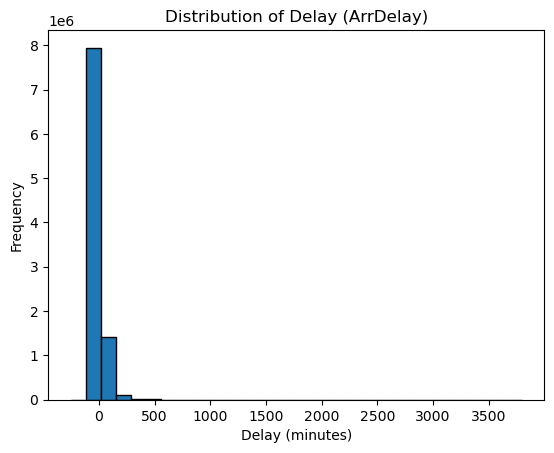

(0,
 count    9.509692e+06
 mean     3.196520e+00
 std      5.113526e+01
 min     -2.530000e+02
 25%     -1.600000e+01
 50%     -7.000000e+00
 75%      6.000000e+00
 max      3.795000e+03
 Name: ArrDelay, dtype: float64)

In [42]:
data = data.dropna(subset=['ArrDelay'])
# Check for NA values in the 'delay' column and calculate the distribution
delay_na_count = data['ArrDelay'].isna().sum()
delay_distribution = data['ArrDelay'].describe()

# Plot distribution of 'delay'
plt.hist(data['ArrDelay'].dropna(), bins=30, edgecolor='black')
plt.title("Distribution of Delay (ArrDelay)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

(delay_na_count, delay_distribution)

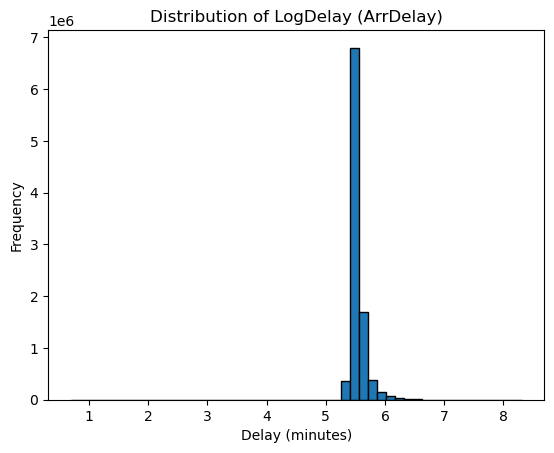

In [43]:
#log
min_delay = data["ArrDelay"].min() 
data['LogArrDelay'] = np.log1p(data["ArrDelay"] - min_delay +1)

plt.hist(data['LogArrDelay'].dropna(), bins=50, edgecolor='black')
plt.title("Distribution of LogDelay (ArrDelay)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

### lightGBM

In [44]:
data = data.sample(frac=0.1, random_state=42)

# Define features and target variable
X = data.drop(columns=['Cancelled', 'DepDelay', 'ArrDelay','LogArrDelay'])
y = data['LogArrDelay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns and convert them to category type if needed
categorical_features = X.select_dtypes(include=['category']).columns.tolist()
# Convert categorical columns in the train and test sets to categorical dtype for LightGBM
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')
    
# Set up LightGBM dataset with categorical features
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features, reference=train_data)

In [45]:
from sklearn.metrics import make_scorer

def custom_huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss).mean()

def huber_loss(preds, train_data):
    d = preds - train_data.get_label()
    delta = 1.0  
    is_small_error = np.abs(d) <= delta
    squared_loss = 0.5 * d ** 2
    linear_loss = delta * (np.abs(d) - 0.5 * delta)
    return 'huber', np.where(is_small_error, squared_loss, linear_loss).mean(), False

huber_scorer = make_scorer(custom_huber_loss, greater_is_better=False)

def custom_quantile_loss(y_true, y_pred, quantile=0.5):
    error = y_true - y_pred
    return np.where(error >= 0, quantile * error, (quantile - 1) * error).mean()

def quantile_loss(preds, train_data):
    d = preds - train_data.get_label()
    quantile = 0.5  
    return 'quantile', np.where(d >= 0, quantile * d, (quantile - 1) * d).mean(), False

quantile_scorer = make_scorer(custom_quantile_loss, greater_is_better=False)

### HuberLoss

### RandomizedSearchCV

In [25]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 31, 50],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5],
    'n_estimators': [100, 300, 1000]
}

lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(objective='regression', random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring=huber_scorer,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'num_leaves': 50, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'lambda_l2': 0, 'lambda_l1': 0.1, 'feature_fraction': 0.9, 'bagging_fraction': 1.0}


In [26]:
best_params = random_search.best_params_
final_model = lgb.LGBMRegressor(**best_params, objective='regression', random_state=42)
final_model.fit(X_train, y_train,eval_set = [(X_test,y_test)],
                 eval_metric=lambda y_true, y_pred: ('huber', custom_huber_loss(y_true, y_pred), False))

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test) # Predict on the test set

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics:
Mean Squared Error: 0.01319510491174172
Root Mean Squared Error: 0.11486994781813788
Mean Absolute Error: 0.06923360836112771
R² Score: 0.2646693631734942

Testing Set Metrics:
Mean Squared Error: 0.01618179461432329
Root Mean Squared Error: 0.12720768300037263
Mean Absolute Error: 0.0748476972012118
R² Score: 0.11405570003886767


In [27]:
# 将 LogArrDelay 转换回 ArrDelay
y_train_log_pred = final_model.predict(X_train)
y_test_log_pred = final_model.predict(X_test)


y_train_pred = np.exp(y_train_log_pred) - 1 + min_delay
y_test_pred = np.exp(y_test_log_pred) - 1 + min_delay
y_train_true = np.exp(y_train) - 1 + min_delay
y_test_true = np.exp(y_test) - 1 + min_delay

train_mse = mean_squared_error(y_train_true, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_true, y_train_pred)
train_r2 = r2_score(y_train_true, y_train_pred)

test_mse = mean_squared_error(y_test_true, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_r2 = r2_score(y_test_true, y_test_pred)

print("Training Set Metrics (Original Scale):")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics (Original Scale):")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics (Original Scale):
Mean Squared Error: 2111.6716897931956
Root Mean Squared Error: 45.95292906652628
Mean Absolute Error: 19.626033226446626
R² Score: 0.2059144633871236

Testing Set Metrics (Original Scale):
Mean Squared Error: 2460.713584819284
Root Mean Squared Error: 49.605580178234824
Mean Absolute Error: 21.190161568769554
R² Score: 0.07052011036159889


### delta value

In [51]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 定义自定义 Huber Loss 的 objective 函数，包含 delta 参数
def custom_huber_loss_objective(y_true, y_pred, delta=1.0):
    residual = y_true - y_pred
    abs_residual = np.abs(residual)
    is_small_error = abs_residual <= delta
    grad = np.where(is_small_error, residual, delta * np.sign(residual))
    hess = np.where(is_small_error, 1.0, 0.0)
    return grad, hess

# 参数网格，包括 delta 值
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 31, 50],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5],
    'n_estimators': [100, 300, 1000],
    'delta': [0.5, 1.0, 2.0]  # 添加 delta 值
}

# 使用 RandomizedSearchCV 进行参数搜索
results = []
for delta in param_grid['delta']:
    # 定义新的 LightGBM 模型，使用自定义的 Huber Loss objective
    lgb_model = lgb.LGBMRegressor(objective=lambda y_true, y_pred: custom_huber_loss_objective(y_true, y_pred, delta),
                                  random_state=42)

    # 定义除了 delta 外的参数
    random_search = RandomizedSearchCV(
        estimator=lgb_model,
        param_distributions={k: v for k, v in param_grid.items() if k != 'delta'},
        n_iter=10,
        cv=3,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )

    # 训练模型
    random_search.fit(X_train, y_train)

    # 记录结果
    best_params = random_search.best_params_
    best_params['delta'] = delta  # 记录当前的 delta 值
    results.append((best_params, random_search.best_score_))

# 找到最佳的参数和得分
best_params, best_score = max(results, key=lambda x: x[1])
print("Best parameters found:", best_params)
print("Best score:", best_score)

# 使用最佳参数和 delta 值训练最终模型
final_model = lgb.LGBMRegressor(
    **{k: v for k, v in best_params.items() if k != 'delta'}, 
    objective=lambda y_true, y_pred: custom_huber_loss_objective(y_true, y_pred, best_params['delta']),
    random_state=42
)
final_model.fit(X_train, y_train)

# 预测和评估
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Best parameters found: {'num_leaves': 50, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.05, 'lambda_l2': 0.1, 'lambda_l1': 0, 'feature_fraction': 0.9, 'bagging_fraction': 0.8, 'delta': 0.5}
Best score: -5.544371104914941
Training Set Metrics:
Mean Squared Error: 30.74005103121828
Root Mean Squared Error: 5.544371112328095
Mean Absolute Error: 5.5427526175871265
R² Score: -1712.067190602681

Testing Set Metrics:
Mean Squared Error: 30.74743059747963
Root Mean Squared Error: 5.545036573141752
Mean Absolute Error: 5.5433893578455224
R² Score: -1682.4048092648327


In [52]:
# 将 LogArrDelay 转换回 ArrDelay
y_train_log_pred = final_model.predict(X_train)
y_test_log_pred = final_model.predict(X_test)


y_train_pred = np.exp(y_train_log_pred) - 1 + min_delay
y_test_pred = np.exp(y_test_log_pred) - 1 + min_delay
y_train_true = np.exp(y_train) - 1 + min_delay
y_test_true = np.exp(y_test) - 1 + min_delay

train_mse = mean_squared_error(y_train_true, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_true, y_train_pred)
train_r2 = r2_score(y_train_true, y_train_pred)

test_mse = mean_squared_error(y_test_true, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_r2 = r2_score(y_test_true, y_test_pred)

print("Training Set Metrics (Original Scale):")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics (Original Scale):")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics (Original Scale):
Mean Squared Error: 68830.74890079195
Root Mean Squared Error: 262.3561489669948
Mean Absolute Error: 257.2382149781473
R² Score: -24.883522727770412

Testing Set Metrics (Original Scale):
Mean Squared Error: 68924.77321051137
Root Mean Squared Error: 262.53527993492867
Mean Absolute Error: 257.44390464473116
R² Score: -25.034801852716576


### YJ transform

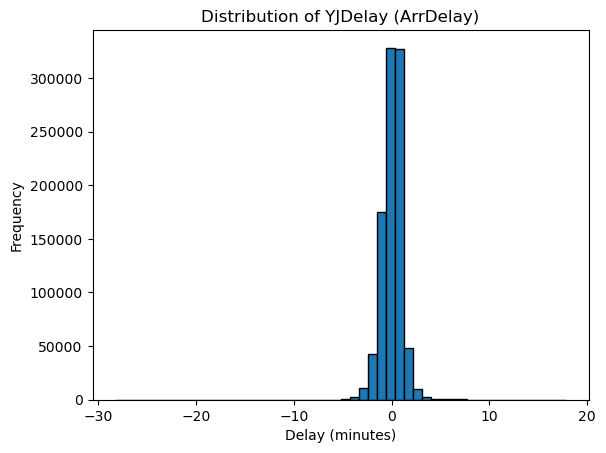

In [28]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data['YJArrDelay'] = pt.fit_transform(data[['ArrDelay']])

plt.hist(data['YJArrDelay'].dropna(), bins=50, edgecolor='black')
plt.title("Distribution of YJDelay (ArrDelay)")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

In [29]:
# Define features and target variable
X = data.drop(columns=['Cancelled', 'DepDelay', 'ArrDelay','LogArrDelay','YJArrDelay'])
y = data['YJArrDelay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns and convert them to category type if needed
categorical_features = X.select_dtypes(include=['category']).columns.tolist()
# Convert categorical columns in the train and test sets to categorical dtype for LightGBM
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')
    
# Set up LightGBM dataset with categorical features
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features, reference=train_data)

In [30]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 31, 50],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5],
    'n_estimators': [100, 300, 1000]
}

lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(objective='regression', random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring=huber_scorer,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'num_leaves': 50, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'lambda_l2': 0, 'lambda_l1': 0.1, 'feature_fraction': 0.9, 'bagging_fraction': 1.0}


In [31]:
best_params = random_search.best_params_
final_model = lgb.LGBMRegressor(**best_params, objective='regression', random_state=42)
final_model.fit(X_train, y_train,eval_set = [(X_test,y_test)],
                 eval_metric=lambda y_true, y_pred: ('huber', custom_huber_loss(y_true, y_pred), False))

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test) # Predict on the test set

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics:
Mean Squared Error: 0.7254472947586632
Root Mean Squared Error: 0.8517319383225354
Mean Absolute Error: 0.6364220652111889
R² Score: 0.27306876607332276

Testing Set Metrics:
Mean Squared Error: 0.8422553682630222
Root Mean Squared Error: 0.9177447184609793
Mean Absolute Error: 0.6818931900151646
R² Score: 0.16456365038874765


In [34]:
# 训练模型并进行预测（假设已经有最佳参数 best_params）
final_model = lgb.LGBMRegressor(**best_params, objective='regression', random_state=42)
final_model.fit(X_train, y_train.ravel())  # 注意转换后的数据形状

# 预测转换后的 y 值
y_train_transformed_pred = final_model.predict(X_train)
y_test_transformed_pred = final_model.predict(X_test)

# 逆转换回原始尺度
y_train_pred = pt.inverse_transform(y_train_transformed_pred.reshape(-1, 1)).ravel()
y_test_pred = pt.inverse_transform(y_test_transformed_pred.reshape(-1, 1)).ravel()
y_train_true = pt.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_true = pt.inverse_transform(y_test.values.reshape(-1, 1)).ravel()

# 计算原始尺度上的误差指标
train_mse = mean_squared_error(y_train_true, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_true, y_train_pred)
train_r2 = r2_score(y_train_true, y_train_pred)

test_mse = mean_squared_error(y_test_true, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_r2 = r2_score(y_test_true, y_test_pred)

# 输出指标
print("Training Set Metrics (Original Scale):")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics (Original Scale):")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics (Original Scale):
Mean Squared Error: 2416.7256456126956
Root Mean Squared Error: 49.16020388091058
Mean Absolute Error: 18.94116857256021
R² Score: 0.09120016600194125

Testing Set Metrics (Original Scale):
Mean Squared Error: 2610.3878262156577
Root Mean Squared Error: 51.09195461337976
Mean Absolute Error: 20.05157412914114
R² Score: 0.01398399082575763


D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


### cv

In [14]:
param = {
    'objective': 'regression',
    'metric': 'None',  
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': -1
}

# cv
cv_results = lgb.cv(
    param,
    train_data,
    num_boost_round=3000,
    #fobj=None,  # 
    feval=huber_loss,  # Huber loss
    nfold=5,
    stratified=False,
    shuffle=True,
    metrics='None',  # 
    #early_stopping_rounds=10,
    #verbose_eval=50
)


best_score = min(cv_results['valid huber-mean'])
best_iteration = len(cv_results['valid huber-mean'])
print("Best CV score:", best_score)
print("Best iteration:", best_iteration)

Best CV score: 0.007890552595833215
Best iteration: 3000


In [15]:
final_model = lgb.LGBMRegressor(
    objective='regression',
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    lambda_l1=0.1,
    lambda_l2=0.1,
    n_estimators=best_iteration,  # cv
    random_state=42
)

final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test) # Predict on the test set

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics:
Mean Squared Error: 0.00991664368433355
Root Mean Squared Error: 0.09958234624838656
Mean Absolute Error: 0.06221458032528167
R² Score: 0.4473699175295144

Testing Set Metrics:
Mean Squared Error: 0.016298652639661133
Root Mean Squared Error: 0.1276661765686634
Mean Absolute Error: 0.07551817452375598
R² Score: 0.1076577878220647


### Quantile loss

In [ ]:
# Define features and target variable
X = data.drop(columns=['Cancelled', 'DepDelay', 'ArrDelay','LogArrDelay'])
y = data['LogArrDelay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns and convert them to category type if needed
categorical_features = X.select_dtypes(include=['category']).columns.tolist()
# Convert categorical columns in the train and test sets to categorical dtype for LightGBM
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')
    
# Set up LightGBM dataset with categorical features
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features, reference=train_data)

In [16]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 31, 50],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5],
    'n_estimators': [100, 500, 1000]
}

lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(objective='quantile', alpha=0.5, random_state=42),  # alpha 决定了 quantile 的分位数
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring=quantile_scorer,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'num_leaves': 50, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'lambda_l2': 0, 'lambda_l1': 0.1, 'feature_fraction': 0.9, 'bagging_fraction': 1.0}


In [17]:
final_model = lgb.LGBMRegressor(**best_params, objective='quantile', alpha=0.5, random_state=42)
final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],
                 eval_metric=lambda y_true, y_pred: ('quantile', custom_quantile_loss(y_true, y_pred, quantile=0.5), False))

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics:
Mean Squared Error: 0.01661819949447388
Root Mean Squared Error: 0.12891159565560376
Mean Absolute Error: 0.06668537161370851
R² Score: 0.07390874881885245

Testing Set Metrics:
Mean Squared Error: 0.017463758609193587
Root Mean Squared Error: 0.13215051497891936
Mean Absolute Error: 0.07049185760957243
R² Score: 0.04386888077189732


### RMSE Loss

In [18]:
# Define the model with early stopping and other parameters
model = LGBMRegressor(
    objective='regression',
    metric='rmse',
    learning_rate=0.3,
    num_leaves=51,
    max_depth=-1,
    feature_fraction=0.8,
    bagging_fraction=0.9,
    bagging_freq=5,
    lambda_l2=0.1, 
    verbose=-1,
    n_estimators=1000  # Setting a high number for early stopping to take effect
)

# Train the model with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse'
)

y_train_pred = model.predict(X_train, num_iteration=model.best_iteration_)
y_test_pred = model.predict(X_test, num_iteration=model.best_iteration_) # Predict on the test set

In [19]:
# Evaluate the model
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics:
Mean Squared Error: 0.009685774498333372
Root Mean Squared Error: 0.09841633247755868
Mean Absolute Error: 0.062460478825980076
R² Score: 0.46023568757838007

Testing Set Metrics:
Mean Squared Error: 0.017096480253406505
Root Mean Squared Error: 0.13075350952615575
Mean Absolute Error: 0.07847074100606061
R² Score: 0.06397716749558646


In [20]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 31, 50],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'lambda_l1': [0, 0.1, 0.5],
    'lambda_l2': [0, 0.1, 0.5],
    'n_estimators': [100, 300, 1000]
}

lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgb.LGBMRegressor(objective='regression', random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'num_leaves': 50, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.05, 'lambda_l2': 0, 'lambda_l1': 0.1, 'feature_fraction': 0.9, 'bagging_fraction': 1.0}


In [21]:
final_model = lgb.LGBMRegressor(**best_params, objective='regression', random_state=42)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print("Mean Squared Error:", train_mse)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)
print("R² Score:", train_r2)

print("\nTesting Set Metrics:")
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", test_rmse)
print("Mean Absolute Error:", test_mae)
print("R² Score:", test_r2)

Training Set Metrics:
Mean Squared Error: 0.01319510491174172
Root Mean Squared Error: 0.11486994781813788
Mean Absolute Error: 0.06923360836112771
R² Score: 0.2646693631734942

Testing Set Metrics:
Mean Squared Error: 0.01618179461432329
Root Mean Squared Error: 0.12720768300037263
Mean Absolute Error: 0.0748476972012118
R² Score: 0.11405570003886767


### plot

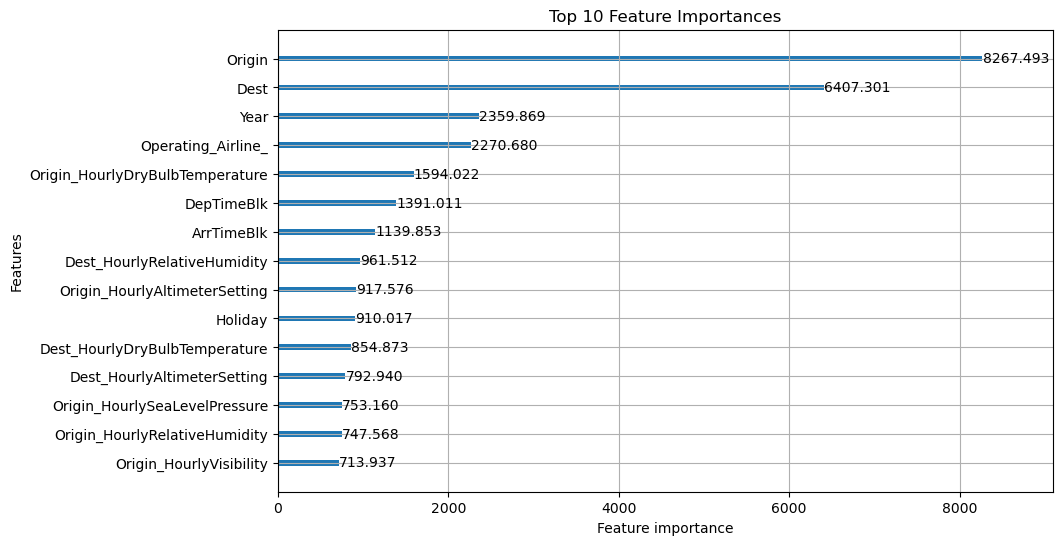

In [22]:
lgb.plot_importance(final_model, max_num_features=15, importance_type='gain', figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.show()

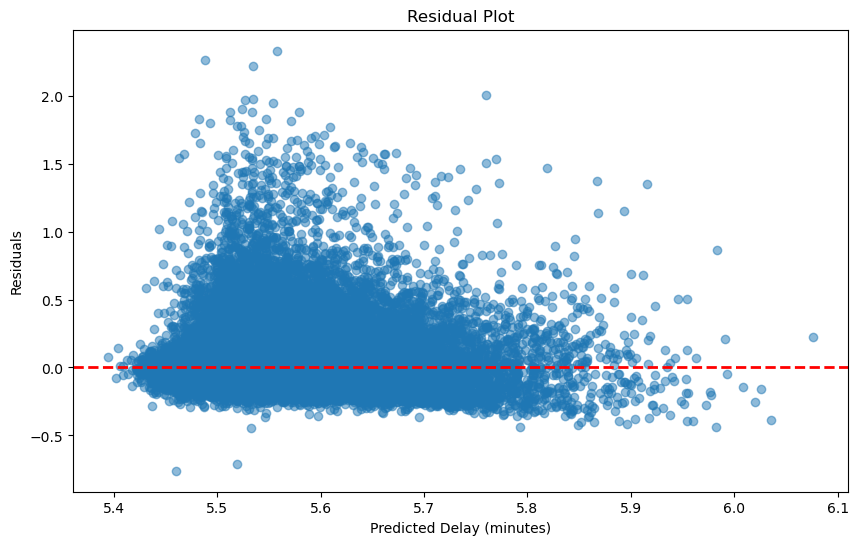

In [23]:
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Delay (minutes)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()